# ✨ Hi There 
#  We're Serial Kernels 🐲

# ✨ Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MaxAbsScaler,PowerTransformer,MinMaxScaler,RobustScaler, StandardScaler, Normalizer, QuantileTransformer

from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.decomposition import PCA

# models
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,VotingClassifier,\
GradientBoostingClassifier,StackingClassifier,VotingClassifier,HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,Perceptron,RidgeClassifier,RidgeClassifierCV,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score, make_scorer
from scipy import stats
from imblearn.over_sampling import SMOTE, ADASYN,BorderlineSMOTE,KMeansSMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.mixture import GaussianMixture

import time

# ✨ Loading Data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train=pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv',index_col='ID')
test=pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv',index_col='ID')
test_ID=test.index

/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


In [3]:
train.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                     
0   58238    971.303       397.202654       186.945510      2.124697   
1   44515    757.601       265.590470       213.967453      1.241266   
2   31662    653.783       239.902428       168.421505      1.424417   
3   38778    734.020       268.446281       184.061923      1.458456   
4   42530    775.403       281.212824       193.236878      1.455275   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
ID                                                                           
0       0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1       0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2       0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3       0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4       0.726511       43028     232.703412  0.729816  0.988426   0.888895   

    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
ID                                                                        
0      0.685561      0.006820      0.000929      0.469994      0.998595   
1      0.896387      0.005966      0.002376      0.803510      0.997370   
2      0.836931      0.007577      0.002293      0.700453      0.997737   
3      0.827733      0.006923      0.002005      0.685142      0.999250   
4      0.827499      0.006612      0.001912      0.684755      0.996507   

           y  
ID            
0      HOROZ  
1      SEKER  
2   DERMASON  
3   DERMASON  
4       SIRA

# ✨ EDA

In [4]:
train.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   10834.000000  10834.000000     10834.000000     10834.000000   
mean    53095.675189    855.274892       320.036169       202.410342   
std     29542.542580    214.991122        85.961630        45.113965   
min     20420.000000    524.932000       183.601165       129.576207   
25%     36343.500000    703.601250       253.501071       175.927024   
50%     44645.000000    793.739500       296.377365       192.525040   
75%     61295.000000    975.517500       376.068399       217.315195   
max    254616.000000   1985.370000       738.860153       450.926187   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  10834.000000  10834.000000   10834.000000   10834.000000  10834.000000   
mean       1.581294      0.750588   53816.205926     253.123583      0.749937   
std        0.244314      0.091481   29999.710739      59.433080      0.048949   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432985      0.716250   36731.250000     215.113880      0.718778   
50%        1.550761      0.764314   45148.000000     238.419335      0.760141   
75%        1.703029      0.809450   62251.500000     279.362162      0.786871   
max        2.388873      0.908167  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  10834.000000  10834.000000  10834.000000  10834.000000  10834.000000   
mean       0.987152      0.873647      0.800244      0.006559      0.001718   
std        0.004626      0.059344      0.061228      0.001127      0.000593   
min        0.919246      0.489618      0.645368      0.002856      0.000564   
25%        0.985627      0.833479      0.763378      0.005888      0.001161   
50%        0.988290      0.883472      0.801428      0.006643      0.001700   
75%        0.990014      0.916883      0.834068      0.007268      0.002169   
max        0.994677      0.990685      0.987303      0.009897      0.003665   

       ShapeFactor3  ShapeFactor4  
count  10834.000000  10834.000000  
mean       0.644139      0.995083  
std        0.098268      0.004306  
min        0.416499      0.947687  
25%        0.582747      0.993690  
50%        0.642287      0.996397  
75%        0.695670      0.997895  
max        0.974767      0.999733

In [5]:
df1=train[train['y']=='HOROZ']
df2=train[train['y']=='SEKER']
df3=train[train['y']=='DERMASON']
df4=train[train['y']=='SIRA']
df5=train[train['y']=='BARBUNYA']
df6=train[train['y']=='CALI']
df7=train[train['y']=='BOMBAY']

In [6]:
dfs=[df1,df2,df3,df4,df5,df6,df7]
for i in dfs:
    print(i['y'].unique())
    display(i.describe())

['HOROZ']


Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count   1488.000000  1488.000000      1488.000000      1488.000000   
mean   53621.056452   919.560155       372.380849       184.168612   
std     7331.434249    70.281609        30.374371        13.357369   
min    33263.000000   689.294000       264.630743       148.167484   
25%    48882.250000   877.292500       356.269876       175.074409   
50%    53777.000000   921.395500       374.783402       183.836913   
75%    58421.250000   965.075500       391.147621       193.332505   
max    81929.000000  1162.588000       456.758154       237.899946   

       AspectRation  Eccentricity    ConvexArea  EquivDiameter       Extent  \
count   1488.000000   1488.000000   1488.000000    1488.000000  1488.000000   
mean       2.024993      0.867238  54406.622312     260.666343     0.705175   
std        0.136411      0.021386   7440.111236      18.047882     0.075159   
min        1.462019      0.729496  33892.000000     205.795449     0.555315   
25%        1.945729      0.857822  49609.750000     249.477080     0.636327   
50%        2.031860      0.870505  54526.500000     261.669643     0.701406   
75%        2.115267      0.881195  59282.750000     272.734753     0.776824   
max        2.388873      0.908167  83019.000000     322.978703     0.866195   

          Solidity    roundness  Compactness  ShapeFactor1  ShapeFactor2  \
count  1488.000000  1488.000000  1488.000000   1488.000000   1488.000000   
mean      0.985576     0.794607     0.701112      0.007006      0.001049   
std       0.005866     0.032172     0.023915      0.000501      0.000153   
min       0.944568     0.556766     0.645368      0.005402      0.000751   
25%       0.984754     0.779806     0.685402      0.006652      0.000954   
50%       0.987005     0.796389     0.698623      0.006976      0.001024   
75%       0.988622     0.812629     0.714001      0.007324      0.001113   
max       0.992798     0.921059     0.825812      0.008675      0.001931   

       ShapeFactor3  ShapeFactor4  
count   1488.000000   1488.000000  
mean       0.492130      0.991963  
std        0.034072      0.006176  
min        0.416499      0.955032  
25%        0.469775      0.990504  
50%        0.488074      0.993723  
75%        0.509797      0.995748  
max        0.681966      0.999016

['SEKER']


Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count   1621.000000  1621.000000      1621.000000      1621.000000   
mean   39966.113510   728.639407       251.701676       201.998695   
std     4856.696876    48.905528        20.220738        11.098162   
min    28395.000000   610.291000       200.524796       171.210559   
25%    36463.000000   693.059000       237.386827       194.084494   
50%    39202.000000   721.543000       249.177437       200.353567   
75%    42749.000000   755.940000       263.351276       208.769629   
max    61150.000000   933.372000       339.931533       252.287649   

       AspectRation  Eccentricity    ConvexArea  EquivDiameter       Extent  \
count   1621.000000   1621.000000   1621.000000    1621.000000  1621.000000   
mean       1.246667      0.585945  40356.480568     225.177160     0.771686   
std        0.082991      0.071724   4903.014571      13.483130     0.018906   
min        1.024868      0.218951  28715.000000     190.141097     0.671871   
25%        1.192692      0.544995  36825.000000     215.467245     0.760201   
50%        1.237435      0.589013  39567.000000     223.413376     0.774296   
75%        1.289020      0.630999  43131.000000     233.301773     0.784746   
max        1.679979      0.803544  61640.000000     279.031536     0.826104   

          Solidity    roundness  Compactness  ShapeFactor1  ShapeFactor2  \
count  1621.000000  1621.000000  1621.000000   1621.000000   1621.000000   
mean      0.990323     0.944050     0.896320      0.006332      0.002534   
std       0.003178     0.033471     0.028938      0.000338      0.000328   
min       0.919246     0.595048     0.770126      0.005056      0.001405   
25%       0.989501     0.935641     0.879948      0.006110      0.002330   
50%       0.990950     0.951588     0.898221      0.006365      0.002536   
75%       0.991960     0.962699     0.914875      0.006571      0.002741   
max       0.994082     0.990685     0.987303      0.007474      0.003665   

       ShapeFactor3  ShapeFactor4  
count   1621.000000   1621.000000  
mean       0.804226      0.998362  
std        0.051475      0.001622  
min        0.593094      0.947687  
25%        0.774309      0.998069  
50%        0.806801      0.998633  
75%        0.836996      0.999018  
max        0.974767      0.999733

['DERMASON']


Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count   2837.000000  2837.000000      2837.000000      2837.000000   
mean   32197.808601   666.160614       246.902856       165.832284   
std     4676.539286    50.495187        20.688208        12.513679   
min    20420.000000   524.932000       183.601165       129.576207   
25%    28654.000000   629.561000       231.927096       156.778177   
50%    31966.000000   665.248000       246.658741       165.938045   
75%    35660.000000   703.664000       261.565812       175.298702   
max    42159.000000   908.265000       308.262336       199.153179   

       AspectRation  Eccentricity    ConvexArea  EquivDiameter       Extent  \
count   2837.000000   2837.000000   2837.000000    2837.000000  2837.000000   
mean       1.490935      0.736859  32578.775467     201.934210     0.752885   
std        0.096173      0.040038   4711.345487      14.770748     0.037449   
min        1.190922      0.543073  20684.000000     161.243764     0.652881   
25%        1.426308      0.713052  29030.000000     191.006298     0.721655   
50%        1.484028      0.738876  32346.000000     201.743340     0.754358   
75%        1.551294      0.764500  36056.000000     213.081492     0.785047   
max        1.965673      0.860925  42667.000000     231.686223     0.852841   

          Solidity    roundness  Compactness  ShapeFactor1  ShapeFactor2  \
count  2837.000000  2837.000000  2837.000000   2837.000000   2837.000000   
mean      0.988218     0.907802     0.818983      0.007746      0.002157   
std       0.003000     0.029867     0.026283      0.000595      0.000283   
min       0.946634     0.489618     0.711975      0.006411      0.001383   
25%       0.987325     0.897034     0.801688      0.007286      0.001962   
50%       0.988727     0.912241     0.819599      0.007696      0.002129   
75%       0.989862     0.924760     0.836137      0.008147      0.002332   
max       0.993629     0.964450     0.915760      0.009897      0.003470   

       ShapeFactor3  ShapeFactor4  
count   2837.000000   2837.000000  
mean       0.671424      0.996933  
std        0.043040      0.001914  
min        0.506909      0.976325  
25%        0.642703      0.996283  
50%        0.671742      0.997376  
75%        0.699124      0.998135  
max        0.838616      0.999709

['SIRA']


Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count   2109.000000  2109.000000      2109.000000      2109.000000   
mean   44712.792793   796.230031       299.294500       190.774824   
std     4565.500512    44.572266        20.757204         9.196401   
min    31519.000000   668.106000       233.804968       157.802740   
25%    41565.000000   765.979000       285.037774       184.918962   
50%    44591.000000   794.368000       298.193007       191.002940   
75%    47767.000000   825.869000       313.146018       197.036412   
max    63612.000000   984.282000       400.931467       224.729309   

       AspectRation  Eccentricity    ConvexArea  EquivDiameter       Extent  \
count   2109.000000   2109.000000   2109.000000    2109.000000  2109.000000   
mean       1.569822      0.767235  45256.706022     238.289177     0.749626   
std        0.095906      0.032584   4615.799961      12.183371     0.044413   
min        1.259251      0.607757  32065.000000     200.327824     0.627527   
25%        1.504058      0.746961  42093.000000     230.048259     0.711219   
50%        1.561117      0.767902  45122.000000     238.275103     0.752663   
75%        1.628937      0.789386  48361.000000     246.614747     0.789365   
max        2.006989      0.867028  64581.000000     284.593243     0.835327   

          Solidity    roundness  Compactness  ShapeFactor1  ShapeFactor2  \
count  2109.000000  2109.000000  2109.000000   2109.000000   2109.000000   
mean      0.987971     0.884742     0.797405      0.006721      0.001683   
std       0.002798     0.023977     0.024361      0.000328      0.000204   
min       0.969256     0.677837     0.704454      0.005686      0.000987   
25%       0.986883     0.871914     0.781593      0.006494      0.001542   
50%       0.988548     0.886866     0.798559      0.006693      0.001677   
75%       0.989778     0.900021     0.813679      0.006913      0.001815   
max       0.992717     0.954104     0.889525      0.008093      0.002571   

       ShapeFactor3  ShapeFactor4  
count   2109.000000   2109.000000  
mean       0.636447      0.995405  
std        0.038820      0.002690  
min        0.496256      0.971228  
25%        0.610887      0.994269  
50%        0.637696      0.996024  
75%        0.662074      0.997197  
max        0.791255      0.999515

['BARBUNYA']


Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count    1057.000000  1057.000000      1057.000000      1057.000000   
mean    69673.259224  1044.961395       369.943828       239.931629   
std     10236.328007    89.748831        32.397344        19.566263   
min     41488.000000   759.552000       266.700396       185.657600   
25%     62831.000000   988.076000       348.145910       226.706349   
50%     69509.000000  1043.643000       369.458839       239.516479   
75%     76098.000000  1101.834000       392.550268       252.656933   
max    105542.000000  1338.893000       483.691256       295.713214   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter       Extent  \
count   1057.000000   1057.000000    1057.000000    1057.000000  1057.000000   
mean       1.546140      0.755427   70896.676443     297.034177     0.749779   
std        0.124621      0.049874   10421.020741      21.952277     0.040514   
min        1.135792      0.474152   42005.000000     229.835076     0.639787   
25%        1.466019      0.731241   63945.000000     282.840792     0.716571   
50%        1.549647      0.763922   70724.000000     297.492197     0.751011   
75%        1.630251      0.789770   77435.000000     311.273164     0.783168   
max        1.950371      0.858554  107112.000000     366.579116     0.840577   

          Solidity    roundness  Compactness  ShapeFactor1  ShapeFactor2  \
count  1057.000000  1057.000000  1057.000000   1057.000000   1057.000000   
mean      0.982758     0.800488     0.804484      0.005365      0.001393   
std       0.004056     0.048406     0.033147      0.000441      0.000214   
min       0.961840     0.593708     0.714494      0.004328      0.000843   
25%       0.980607     0.773131     0.781819      0.005062      0.001236   
50%       0.983035     0.802919     0.801701      0.005338      0.001365   
75%       0.985427     0.835331     0.824284      0.005635      0.001518   
max       0.992549     0.931959     0.937007      0.006874      0.002433   

       ShapeFactor3  ShapeFactor4  
count   1057.000000   1057.000000  
mean       0.648292      0.995689  
std        0.053896      0.002643  
min        0.510502      0.976512  
25%        0.611241      0.994548  
50%        0.642725      0.996347  
75%        0.679444      0.997457  
max        0.877981      0.999351

['CALI']


Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count    1304.000000  1304.000000      1304.000000      1304.000000   
mean    75440.769939  1056.743706       409.101924       236.272249   
std      9444.316811    68.183166        29.899404        14.596991   
min     45504.000000   789.770000       274.863357       179.834691   
25%     69089.250000  1014.042500       390.318496       226.728431   
50%     74641.500000  1054.177500       408.122242       235.507339   
75%     81403.000000  1101.476000       428.265987       244.986501   
max    116272.000000  1326.583000       534.484404       291.873017   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter       Extent  \
count   1304.000000   1304.000000    1304.000000    1304.000000  1304.000000   
mean       1.732528      0.814531   76588.358896     309.325305     0.759241   
std        0.091205      0.023004    9583.276139      19.295410     0.041885   
min        1.297228      0.636987   45972.000000     240.702082     0.631988   
25%        1.675483      0.802358   70214.000000     296.592589     0.734091   
50%        1.732188      0.816529   75742.500000     308.279921     0.766648   
75%        1.793295      0.830088   82594.500000     321.940241     0.792768   
max        2.008074      0.867183  118144.000000     384.762405     0.850251   

          Solidity    roundness  Compactness  ShapeFactor1  ShapeFactor2  \
count  1304.000000  1304.000000  1304.000000   1304.000000   1304.000000   
mean      0.985028     0.846216     0.756959      0.005461      0.001110   
std       0.005685     0.023338     0.020598      0.000336      0.000132   
min       0.960667     0.727194     0.701215      0.004399      0.000762   
25%       0.981515     0.831120     0.743059      0.005247      0.001021   
50%       0.986158     0.846627     0.755899      0.005462      0.001093   
75%       0.989448     0.862021     0.769182      0.005667      0.001179   
max       0.994260     0.920029     0.877273      0.007161      0.002199   

       ShapeFactor3  ShapeFactor4  
count   1304.000000   1304.000000  
mean       0.573411      0.990608  
std        0.031442      0.004393  
min        0.491702      0.970210  
25%        0.552137      0.988232  
50%        0.571384      0.991269  
75%        0.591640      0.993781  
max        0.769608      0.999368

['BOMBAY']


Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count     418.000000   418.000000       418.000000       418.000000   
mean   174644.691388  1590.797629       595.659564       375.391936   
std     22940.608097   114.378978        52.756584        22.508302   
min    114004.000000  1265.926000       425.923787       323.747996   
25%    157937.250000  1510.819750       561.896391       359.689993   
50%    172856.500000  1591.361500       593.206795       373.196086   
75%    187630.750000  1659.780750       631.702808       388.677220   
max    254616.000000  1985.370000       738.860153       450.926187   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter      Extent  \
count    418.000000    418.000000     418.000000     418.000000  418.000000   
mean       1.587750      0.771276  177005.933014     470.556590    0.777878   
std        0.118775      0.041032   23472.141932      30.712860    0.038236   
min        1.212715      0.565722  115298.000000     380.991340    0.607021   
25%        1.506043      0.747740  160031.500000     448.432770    0.757506   
50%        1.586837      0.776445  175301.500000     469.135065    0.784117   
75%        1.656309      0.797172  189987.500000     488.772841    0.806246   
max        1.933856      0.855924  263261.000000     569.374358    0.858420   

         Solidity   roundness  Compactness  ShapeFactor1  ShapeFactor2  \
count  418.000000  418.000000   418.000000    418.000000    418.000000   
mean     0.986825    0.864766     0.792012      0.003432      0.000839   
std      0.005328    0.026789     0.030682      0.000200      0.000134   
min      0.957261    0.758417     0.713613      0.002856      0.000564   
25%      0.984958    0.846881     0.772886      0.003301      0.000743   
50%      0.988297    0.865019     0.790355      0.003439      0.000822   
75%      0.990276    0.884115     0.811974      0.003580      0.000924   
max      0.994677    0.950104     0.906315      0.003959      0.001515   

       ShapeFactor3  ShapeFactor4  
count    418.000000    418.000000  
mean       0.628223      0.991713  
std        0.048859      0.004545  
min        0.509244      0.968842  
25%        0.597353      0.989596  
50%        0.624661      0.992476  
75%        0.659302      0.994890  
max        0.821407      0.999148

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [8]:
train.y.unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

## Checking Duplicates

In [9]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


## Visualization

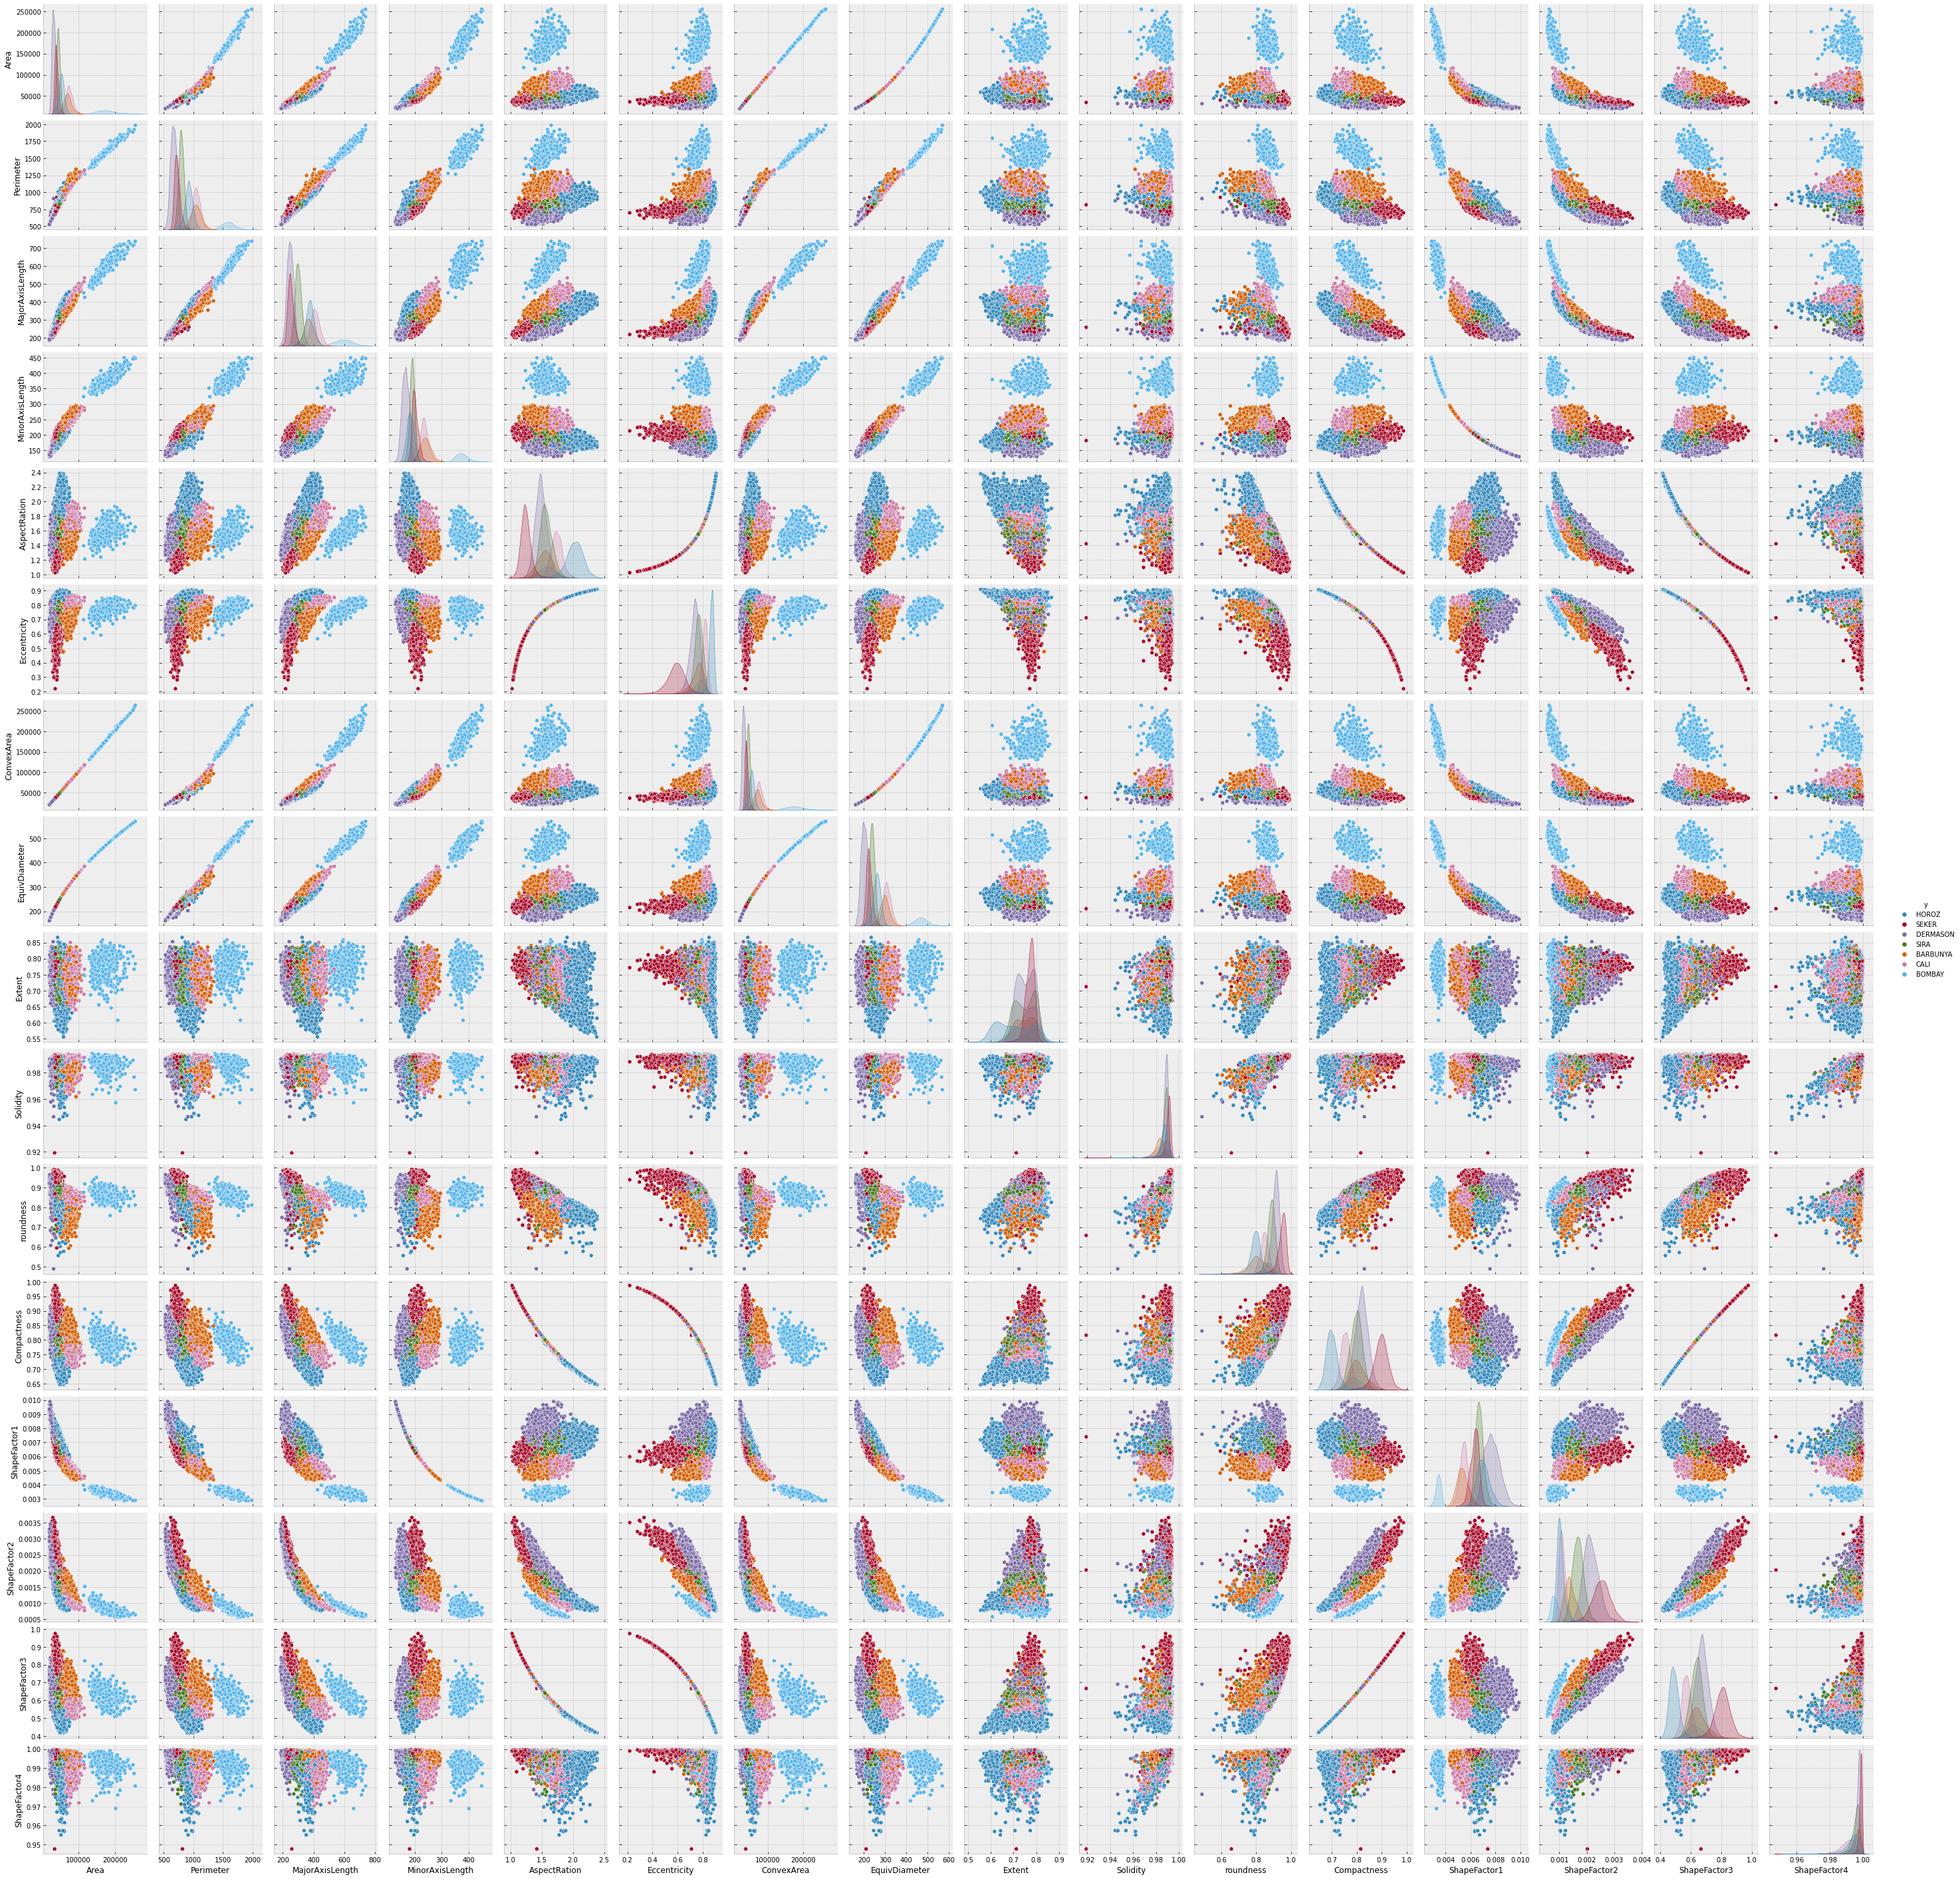

In [10]:
sns.pairplot(train,hue='y')

## Checking the Skeweness of the data

In [11]:
train.skew(axis=0)

Area               2.970246
Perimeter          1.650773
MajorAxisLength    1.390286
MinorAxisLength    2.251468
AspectRation       0.589186
Eccentricity      -1.075626
ConvexArea         2.960315
EquivDiameter      1.971378
Extent            -0.900892
Solidity          -2.507634
roundness         -0.659566
Compactness        0.038242
ShapeFactor1      -0.544873
ShapeFactor2       0.292677
ShapeFactor3       0.245589
ShapeFactor4      -2.628540
dtype: float64

## Correlation

<AxesSubplot:>

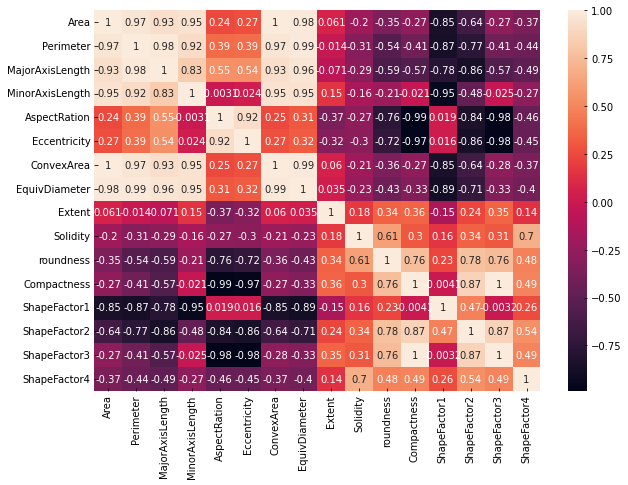

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),annot=True)

# ✨ Gathering Insights


* The Data Suffers from High Skeweness
* The data is Imblanaced there are different distributions in each class
* There is High correlation between columns
* No Duplicates 
* No missing Values

## Mapping The Target Classes

In [13]:
train['y'] = train['y'].map({'HOROZ':0, 'SEKER':1, 'DERMASON':2, 'SIRA':3, 'BARBUNYA':4, 'CALI':5, 'BOMBAY':6})

In [14]:
train.y.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [15]:
print(train.shape)
print(test.shape)

(10834, 17)
(2709, 16)


#  ✨ Detecting outliers

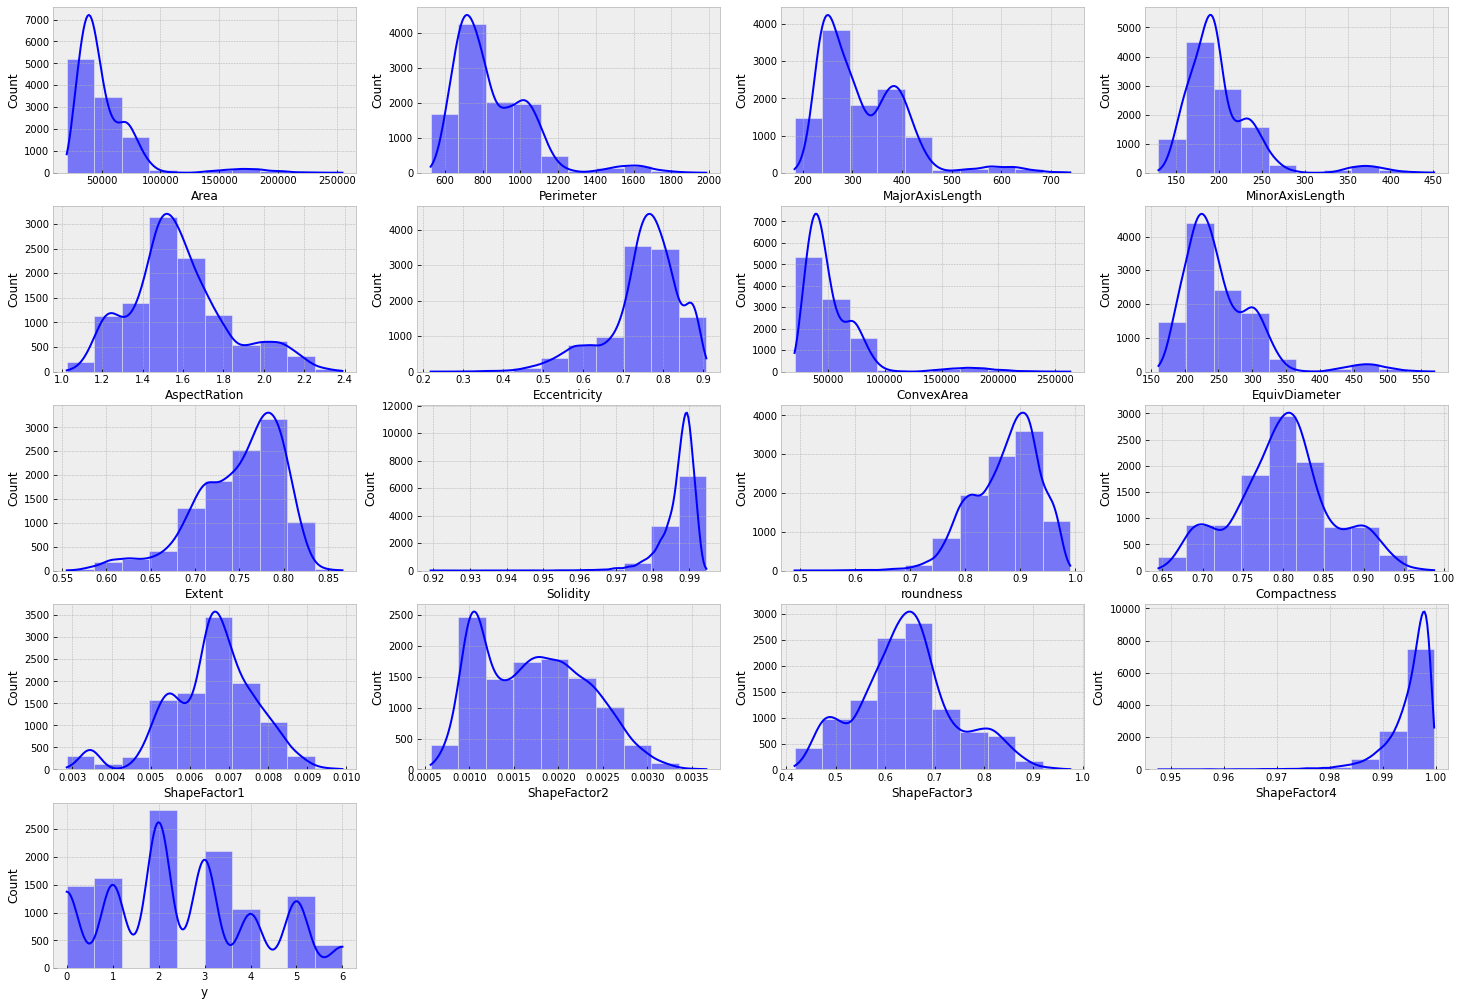

In [16]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(list(train.columns)):
    plt.subplot(7, 4, i+1)
    sns.histplot(train[col], kde=True, bins=10)

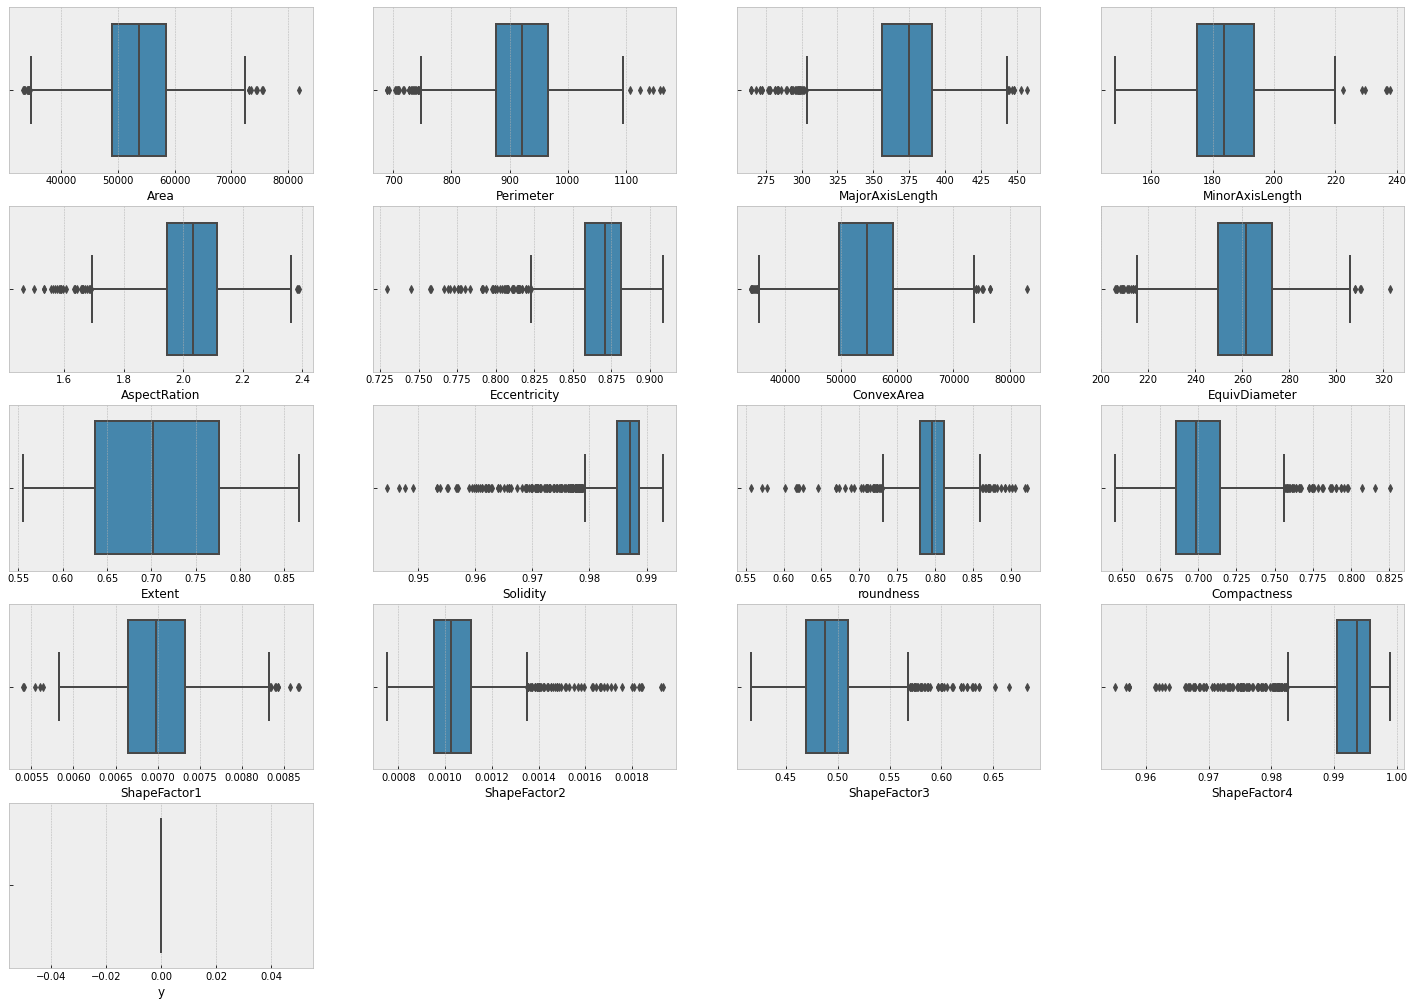

In [17]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(list(train.columns)):
    plt.subplot(7, 4, i+1)
    sns.boxplot(train[train['y'] == 0][col])

In [18]:
# #remove all outliers
# from scipy import stats
# z_scores = stats.zscore(train)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 2).all(axis=1)
# train = train[filtered_entries]

In [19]:
Y=train['y']
train.drop('y',axis='columns',inplace=True)

In [20]:
# #boxcox outliers handling
# for col in train.columns:
#     train[col],fitted_lambda= stats.boxcox(train[col] ,lmbda=None)
#     test[col],fitted_lambda= stats.boxcox(test[col] ,lmbda=None)

In [21]:
# #imputing outliers using median
# for col in train.columns:
#     q1 = train[col].quantile(0.25)
#     q3 = train[col].quantile(0.75)
#     iqr = q3-q1
#     Lower_tail = q1 - 1.5 * iqr
#     Upper_tail = q3 + 1.5 * iqr
#     m = np.median(train[col])
#     for i in train[col]:
#         if i > Upper_tail or i < Lower_tail:
#                 train[col] = train[col].replace(i, m)
    
#     q1 = test[col].quantile(0.25)
#     q3 = test[col].quantile(0.75)
#     iqr = q3-q1
#     Lower_tail = q1 - 1.5 * iqr
#     Upper_tail = q3 + 1.5 * iqr
#     m = np.median(test[col])
#     for i in test[col]:
#         if i > Upper_tail or i < Lower_tail:
#                 test[col] = test[col].replace(i, m)

# ✨ Splitting the data

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(train,Y, train_size=0.8,random_state=465,stratify=Y)

# ✨ Treating Imbalanced Data

In [23]:
#balancing Dataset
print(train.shape)
print(Y.value_counts())
oversample = BorderlineSMOTE(sampling_strategy={2:3000,6:1300,4:1300,1:2000,5:1900},random_state = 465)
train, Y = oversample.fit_resample(train, Y)
print(train.shape)
print(Y.value_counts())

(10834, 16)
2    2837
3    2109
1    1621
0    1488
5    1304
4    1057
6     418
Name: y, dtype: int64
(13097, 16)
2    3000
3    2109
1    2000
5    1900
0    1488
4    1300
6    1300
Name: y, dtype: int64


# ✨ Data Scaling

In [24]:
scaler=PowerTransformer()
train=pd.DataFrame(scaler.fit_transform(train),columns=train.columns)
test=pd.DataFrame(scaler.transform(test),columns=test.columns)

# ✨ Grid Search

In [25]:
# rf=RandomForestClassifier()
# ada=AdaBoostClassifier()
# et=ExtraTreesClassifier()
# gbc=GradientBoostingClassifier()  #excluded due to very long training time and not getting best results
# hgbc=HistGradientBoostingClassifier()
# per=Perceptron()
# rc=RidgeClassifier()
# rcv=RidgeClassifierCV()
# sgd=SGDClassifier()
# dt=DecisionTreeClassifier()
# svm=SVC()
# xgb=XGBClassifier()
# catb=CatBoostClassifier(verbose=None)
# knn=KNeighborsClassifier(7)
# mlp=MLPClassifier()


# models=[rf,ada,et,hgbc,per,rc,rcv,sgd,dt,svm,xgb,knn,mlp] 
# # models=[svm,ada]

# for model in models:
#     start=time.time()
#     grid=GridSearchCV(estimator=model,param_grid={},scoring='f1_micro',cv=5,verbose=1)
#     grid.fit(train,Y)
#     end = time.time()
#     print(model, '\n', grid.best_score_,'\n', round(end-start))

# ✨ Model

In [26]:
train.drop(['AspectRation','Eccentricity'],axis=1,inplace=True)
test.drop(['AspectRation','Eccentricity'],axis=1,inplace=True)

In [27]:
# params={
#     'C':[5.3],
#     'kernel' : ['poly'],
#     'decision_function_shape':['ovo'],
#     'coef0' : [3.1],
#        }
# model = GridSearchCV(estimator=SVC(random_state = 465), param_grid=params, scoring='f1_micro', cv=3,verbose=3)
# model.fit(train,Y)
# print(model.best_params_)
# print(model.best_estimator_)
# print(model.best_score_)
# bestmodel=model.best_estimator_

In [28]:
# params={#'hidden_layer_sizes':[45,50,55,60],
#     'hidden_layer_sizes':[24],
# #        'activation':['identity', 'logistic', 'tanh', 'relu'],
# #        'early_stopping':[True],
#         'beta_1' :[.7],
#        }
# model = GridSearchCV(estimator=MLPClassifier(random_state = 158), param_grid=params, scoring='f1_micro', cv=StratifiedKFold(10),verbose=3)
# model.fit(train,Y)
# print(model.best_params_)
# print(model.best_estimator_)
# print(model.best_score_)
# bestmodel=model.best_estimat

In [29]:
# class CatBoostClassifierInt(CatBoostClassifier):
#     def predict(self, data, prediction_type='Class', ntree_start=0, ntree_end=0, thread_count=1, verbose=None,parent_method_name=None):
#         predictions = self._predict(data, prediction_type, ntree_start, ntree_end, thread_count, verbose,parent_method_name)
     
#         # This line is the only change I did
#         return np.asarray(predictions, dtype=np.int64).ravel()

In [30]:
# catboost=CatBoostClassifierInt(CatBoostClassifier(depth= 8, iterations= 90, learning_rate= 0.2))

In [31]:
voting_est=[('SVC',SVC(C=5.3, coef0=3.1, decision_function_shape='ovo', kernel='poly',random_state=0)),
            ('MultiLayer Perceptron',MLPClassifier(beta_1=0.7, hidden_layer_sizes=24, random_state=158)),
           ('XGBoost',XGBClassifier(booster='dart',eta=0.03,max_depth=15,subsample=0.8,gamma=0,n_estimators=230,colsample_bytree=0.6,colsample_bylevel=0.6,colsample_bynode=0.6))]
vc=VotingClassifier(estimators=voting_est)


models=[vc] 
# models=[svm,ada]

for mod in models:
    start=time.time()
    model=GridSearchCV(estimator=mod,param_grid={},scoring='f1_micro',cv=StratifiedKFold(5),verbose=0)
    model.fit(train,Y)
    end = time.time()
    print(mod, '\n', model.best_score_,'\n', round(end-start))
    bestmodel=model.best_estimator_

[16:38:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:39:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:41:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

# ✨ Making Predictions

In [32]:
pred=bestmodel.predict(test)
predictions = pd.DataFrame({'ID':test_ID,
                       'y': pred})

In [33]:
predictions['y']=predictions['y'].map({0:'HOROZ', 1:'SEKER', 2:'DERMASON', 3:'SIRA', 4:'BARBUNYA', 5:'CALI',6:'BOMBAY'})

In [34]:
predictions

ID         y
0     10834     HOROZ
1     10835  DERMASON
2     10836  BARBUNYA
3     10837  DERMASON
4     10838    BOMBAY
...     ...       ...
2704  13538      CALI
2705  13539     SEKER
2706  13540     HOROZ
2707  13541  DERMASON
2708  13542      SIRA

[2709 rows x 2 columns]

# ✨ Generating Submission File

In [35]:
predictions.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
